# **Capstone Project Module 3  : Machine Learning for Predicting Telco Customer Churn**

#### **Content**
1. Business Problem Understanding
2. Data Understanding
3. Exploratory Data Analysis
4. Data Preprocessing
5. Modelling
6. Conclusion & Recommendation

---

## **Business Understanding**

**Context :**


Pada saat ini, industri telekomunikasi telah dengan berkembang sangat pesat. Banyak sekali perusahaan telekomunikasi yang bersaing menawarkan jasanya menggunakan sistem berlangganan untuk menjual jasanya, sehingga persaingan antar perusahaan semakin ketat. Salah satu tantangan yang kini dihadapi oleh perusahaan adalah mempertahankan jumlah pengguna customer yang telah berlangganan agar tidak beralih ke perusahaan kompetitor.

Suatu perusahaan ingin mengetahui pelanggan yang bagaimana yang akan pindah (churn) dari perusahaan tersebut sehingga jumlah pelanggan yang beralih (churn) dapat dikurangi. Seorang Data Scientist diminta untuk membuat model prediksi yang tepat untuk menentukan pelanggan akan yang akan berhenti menggunakan layanan (churn) atau tidak dengan menggunakan Machine Learning.

Target :

0 : Tidak berhenti menggunakan layanan

1 : Berhenti menggunakan layanan (churn)

**Problem Statement :**

Untuk suatu perusahaan telekomunikasi, tingginya persentase pelanggan yang melakukan *churn* adalah salah satu indikator yang menjadi tingkat kegagalan suatu perusahaan tersebut, sehingga diperlukan upaya untuk mengurangi persentase pelanggan *churn* tersebut. Pada umumnya perusahaan lebih memilih untuk mempertahankan pelanggan, karena biaya untuk mempertahankan pelanggan *(customer retention cost)* lebih rendah daripada memperoleh pelanggan baru *(customer acquisition cost)*.Berdasarkan informasi dari internet, memperoleh pelanggan baru dapat menghabiskan biaya lima kali lebih banyak daripada mempertahankan pelanggan yang sudah ada. Adapun rata-rata biaya customer acquisition cost untuk industri telekomunikasi adalah sekitar $315 per new customer.

Salah satu cara perusahaan telekomunikasi mempertahankan para customernya agar tetap berlangganan atau tidak *churn*, yaitu dengan memberikan insentif retensi terhadap pelanggan. Insentif retensi yang dimaksud adalah dengan memberikan suku bunga yang menarik, memberikan paket layanan yang menarik, memberikan prioritas pelayanan dan lain-lain dalam upaya untuk mempertahankan para customer atau pelanggan perusahaan telekomunikasi tersebut. Namun, kebijakan pemberian insentif retensi belum sepenuhnya dilakukan secara efektif. Karena jika insentif retensi tersebut diberikan secara merata kepada seluruh pelanggan, maka pengeluaran biaya tersebut menjadi tidak efektif dan dapat mengurangi keuntungan apabila pelanggan tersebut memang loyal dan tidak ingin berhenti menggunakan layanan.

**Goals :**

Berdasarkan permasalahan di atas, perusahaan ingin memiliki kemampuan untuk memprediksi kemungkinan seorang pelanggan akan berhenti menggunakan layanan *(churn)* atau tidak, sehingga perusahaan dapat memfokuskan upaya untuk mempertahankan para pelanggannya pada pelanggan yang terindikasi untuk *churn*. 

Selain itu, perusahaan ingin mengetahui berbagai macam faktor-faktor yang mempengaruhi pelanggan bertahan, sehingga mereka dapat membuat program kebijakan yang tepat sasaran untuk mengurangi jumlah pelanggan yang berhenti berlangganan *(churn)*.

**Analytic Approach :**

Jadi yang akan dilakukan adalah menganalisis data untuk menemukan pola yang membedakan pelanggan yang akan berhenti menggunakan layanan *(churn)* atau tidak.

Kemudian akan membangun permodelingan machine learning klasifikasi yang akan membantu perusahaan untuk dapat memprediksi seorang pelanggan akan berhenti menggunakan layanan *(churn)* atau tidak.

**Metrix Evaluation :**

Error 1 : False Positive (customer yang aktualnya tidak churn,diprediksi churn) Konsekuensi biaya Sebesar $63

Error 2 : False Negative (customer yang aktualnya churn,diprediksi tidak akan churn) Konsekuensi: kehilangan pelanggan dan kehilangan biaya sebesar $315

Berdasarkan konsekuensinya, maka sebisa mungkin yang akan kita lakukan adalah membuat model yang dapat mengurangi customer churn dari perusahaan tersebut, khususnya jumlah False Negative (customer yang aktualnya churn tetapi diprediksi tidak akan churn), tetapi juga dapat meminimalisir pemberian insentif yang tidak tepat. Jadi nanti metric utama yang akan kita gunakan adalah f2_score, karena recall kita anggap dua kali lebih penting daripada precision. Kehilangan customer memakan biaya sebesar $315 sedangkan mempertahankan customer memakan biaya yang jauh lebih sedikit https://blog.usetada.com/id/retensi-lebih-menguntungkan-daripada-akuisisi#

## **Data Understanding**

- Sumber data : https://www.kaggle.com/datasets/blastchar/telco-customer-churn
- Pembuat data : IBM
- Periode pembuatan data : Juli 2019

### Attribute Information

| Attribute | Data Type,Length	| Description |
| --- | --- | --- |
| Dependents | Text | Whether the customer has dependents or not. |
| tenure | Integer | Number of months the customer has stayed with the company |
| OnlineSecurity | Text | Indicates if the customer subscribes to an additional online security service provided by the company. |
| OnlineBackup | Text | Indicates if the customer subscribes to an additional online backup service provided by the company.Gender of candidate |
| InternetService | Text | Indicates if the customer subscribes to Internet service with the company. |
| DeviceProtection | Text | Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company |
| TechSupport | Text | Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times. |
| Contract | Text | Indicates the customer’s current contract type. |
| PaperlessBilling | Text | Indicates if the customer has chosen paperless billing. |
| MonthlyCharges | Float | Indicates the customer’s current total monthly charge for all their services from the company. |
| Churn (Target) | Text | Whether the customer churns or not.( Yes = the customer left the company this quarter. No = the customer remained with the company.) |

### Load Dataset

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import normaltest
import scipy.stats as stats

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report, confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve
from sklearn.metrics import fbeta_score, make_scorer

from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [93]:
df = pd.read_csv('data_telco_customer_churn.csv')
df

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No
...,...,...,...,...,...,...,...,...,...,...,...
4925,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45,No
4926,Yes,10,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,91.10,No
4927,No,58,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.75,No
4928,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.75,Yes


In [94]:
# Menampilkan ringkasan data set
print(df.shape)
df.info()

(4930, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


Dataset berisi 4930 baris dan 11 kolom yang memberikan informasi pelanggan.

In [95]:
# Menghitung jumlah churn
df['Churn'].value_counts()

Churn
No     3614
Yes    1316
Name: count, dtype: int64

In [96]:
# menghitung persentase churn
df['Churn'].value_counts()/len(df) * 100

Churn
No     73.306288
Yes    26.693712
Name: count, dtype: float64

### Missing Value

In [97]:
# Pengecekan missing value
df.isna().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

Dalam dataset data_telco_customer_churn ini tidak terdapat missing value

### Duplicated Data

In [98]:
# Pengecekan data duplicated
df.duplicated().sum()

77

Terdapat 77 Data duplicate pada data set ini

Dapat dilihat bahwa : 

- Setiap baris data merepresentasikan informasi seorang pelanggan
- Sebagian besar feature bersifat kategorikal :
- Kategorikal : `Dependents`, `Online Security`, `Online Backup`, `Internet Service`, `Device Protection`,`Tech Support`,`Contract`,`PaperlessBilling`
- Numerikal : `tenure`, `MonthlyCharges`
- Target adalah kolom `Churn` (No = 3614 data, Yes = 1316 data)
- Dataset tidak seimbang  (mild imbalance) karena proporsi kelas minoritas sebesar 26.69% berada dalam rentang 20-40% dari dataset 
- Tidak terdapat missing values pada dataset
- Terdapat 77 Data Duplicate pada data set

### Descriptive Statistics

In [99]:
# Menampilkan Descriptive Statistics Numerikal dan Kategorikal
display(df.describe(),
df.describe(include='object'))

,tenure,MonthlyCharges
count,4930.000000,4930.000000
mean,32.401217,64.883032
std,24.501193,29.923960
min,0.000000,18.800000
25%,9.000000,37.050000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.650000


,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,Churn
count,4930,4930,4930,4930,4930,4930,4930,4930,4930
unique,2,3,3,3,3,3,3,2,2
top,No,No,No,Fiber optic,No,No,Month-to-month,Yes,No
freq,3446,2445,2172,2172,2186,2467,2721,2957,3614


- `tenure` adalah data jumlah bulan pelanggan yang menggunakan layanan perusahaan. Nilainya ada pada rentang 0 - 72 bulan dengan rata-rata 32 bulan dan median 29 bulan.
- `MonthlyCharges` adalah data jumlah biaya bulanan perpelanggan. Nilainya ada pada rentang 18.80 - 118.65 dengan rata-rata nilai 64.88 dan median 70.35.
- Modus pada kolom `Dependents`,`OnlineSecurity`,`OnlineBackup`,`DeviceProtection`,`TechSupport` dan `Churn` adalah 'No'.
- Modus pada kolom InternetService adalah 'Fiber Optic'.
- Modus pada kolom `Contract` adalah 'Month-to-month'.
- Modus pada kolom `PaperlessBilling` adalah 'Yes'.

### Unique Value

In [100]:
#Menampilkan Total Nilai Unik dan Nilai unik dari tiap kolom
pd.set_option('display.max_colwidth', None)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()   ])

unique_values = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'], data=listItem)
unique_values

,Column Name,Number of Unique,Unique Sample
0,Dependents,2,"[Yes, No]"
1,tenure,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1, 48, 13, 58, 7, 4, 70, 34, 31, 37, 15, 71, 10, 43, 22, 33, 69, 54, 63, 55, 66, 56, 32, 26, 24, 2, 51, 23, 49, 28, 36, 45, 42, 6, 61, 59, 67, 65, 0, 16, 52, 41, 25, 62, 20, 50, 30, 60, 19, 35, 57, 27, 44, 53, 12, 46, 39, 29, 38, 68, 21]"
2,OnlineSecurity,3,"[No, Yes, No internet service]"
3,OnlineBackup,3,"[No, Yes, No internet service]"
4,InternetService,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,3,"[Yes, No internet service, No]"
6,TechSupport,3,"[Yes, No, No internet service]"
7,Contract,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,2,"[Yes, No]"
9,MonthlyCharges,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7, 44.05, 73.5, 40.3, 33.6, 96.25, 70.45, 30.55, 44.8, 20.0, 81.5, 94.35, 35.3, 50.7, 106.05, 56.3, 20.65, 98.9, 40.2, 81.2, 19.45, 116.1, 55.2, 94.45, 84.85, 19.6, 79.0, 74.7, 30.4, 55.8, 104.5, 70.55, 55.25, 96.65, 88.85, 109.25, 104.75, 74.4, 79.4, 74.1, 73.05, 94.6, 70.35, 79.6, 79.5, 90.7, 81.0, 87.75, 118.65, 24.8, 105.25, 57.8, 19.0, 25.7, 54.2, 44.85, 19.95, 81.05, 20.35, 85.25, 67.45, 100.3, 20.95, 105.2, 26.35, 82.15, 102.6, 106.15, 23.95, 115.8, 66.85, 90.35, 89.85, 73.35, 104.45, 35.45, 88.4, 70.5, 25.1, 39.0, 83.25, 74.3, 54.3, 50.45, 86.0, 19.55, 103.5, 91.7, 64.85, 99.65, 68.75, 106.25, 75.9, 94.4, ...]"


Dari tabel diatas dapat dilihat bahwa : 

- `tenure` berisi data diskrit yang menunjukan jumlah bulan.
- `MonthlyCharges` berisi data kontinu yang menunjukan jumlah biaya yang dikeluarkan pelanggan perbulan.
- `Dependent`,`Paperless Billing`, dan `Churn` memiliki 2 unique value yaitu 'Yes' atau 'No'.
- `OnlineSecurity`,`OnlineBackup`,`DeviceProtection` dan `TechSupport` memiliki 3 unique value yaitu 'Yes', 'No' atau 'No internet service'.
- `InternetService` memiliki 3 unique value yaitu 'DSL', 'Fiber optic' atau 'No'.
- `Contract` memiliki nilai berupa 'Month-to-month', 'Two year' atau 'One year'.

## **Explorarity Data Analysis (EDA)**

### **Numerical Features**

In [101]:
# Numerical features
numerical_features = df.describe().columns
numerical_features

Index(['tenure', 'MonthlyCharges'], dtype='object')

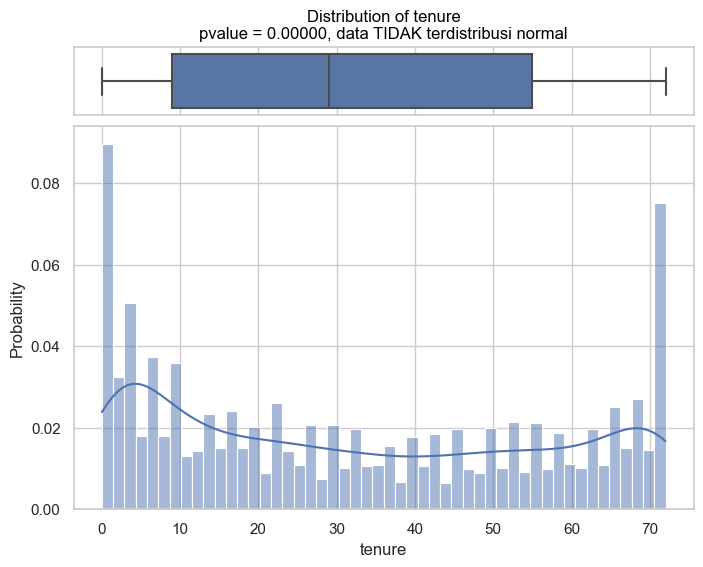

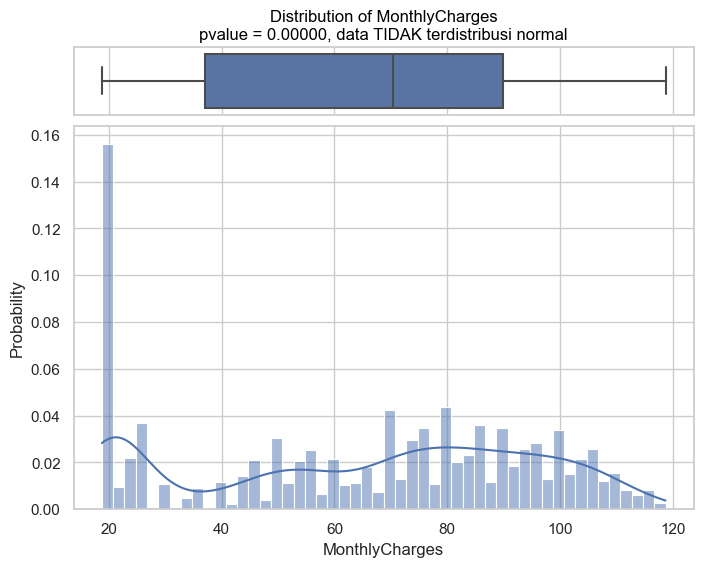

In [102]:
# Melihat Outlier dan Menguji normalitas pada kolom numerikal menggunakan normaltest
for kolom in numerical_features:

    fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (8,6), 
                                    gridspec_kw={"height_ratios": (.15, .85),
                                                "hspace": 0.05})

    stat, pvalue = normaltest(df[kolom].dropna())

    if pvalue > 0.05 :
        distribusi = f'pvalue = {pvalue:.5f}, data terdistribusi normal'
    else :
        distribusi = f'pvalue = {pvalue:.5f}, data TIDAK terdistribusi normal'

    ax1.set_title(f"Distribution of {kolom}\n{distribusi}", color = "black")
    sns.boxplot(x = df[kolom], ax = ax1)
    ax1.set(xlabel = "")

    sns.histplot(data = df[kolom], ax = ax2, stat = "probability", kde=True, bins=50)

    plt.show()

- Kolom `tenure` dan `MonthlyCarges` tidak terdapat nilai Outlier dan kedua kolom tersebut setelah diuji statistik dengan normalitytest ternyata tidak terdistribusi normal,Setelahnya kita akan melihat corellasi antar kedua kolom tersebut

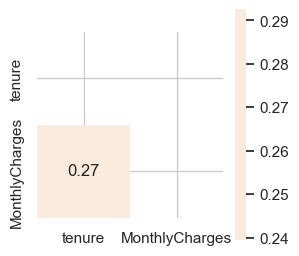

In [103]:
# Melihat correlasi 
plt.figure(figsize=(3,3))

matrix = np.triu(df.corr(method='spearman',numeric_only=True))

sns.heatmap(data=df.corr(method='spearman',numeric_only=True), annot=True, fmt='.2f', cmap='rocket', center=0, mask = matrix, square='True')
plt.show()

Jika kita lihat dari ujia correlasi antara kolom `MonthlyCharges` dan `tenure` nilainya adalah 0.27 yang ini menandakan bahwa kedua kolom tersebut memiliki hubungan yang positif tetapi lemah.

### **Categorical Features**

In [104]:
# Mendefisnisikan Categorical Features
categorical_features = df.describe(include='object').columns
categorical_features

Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling',
       'Churn'],
      dtype='object')

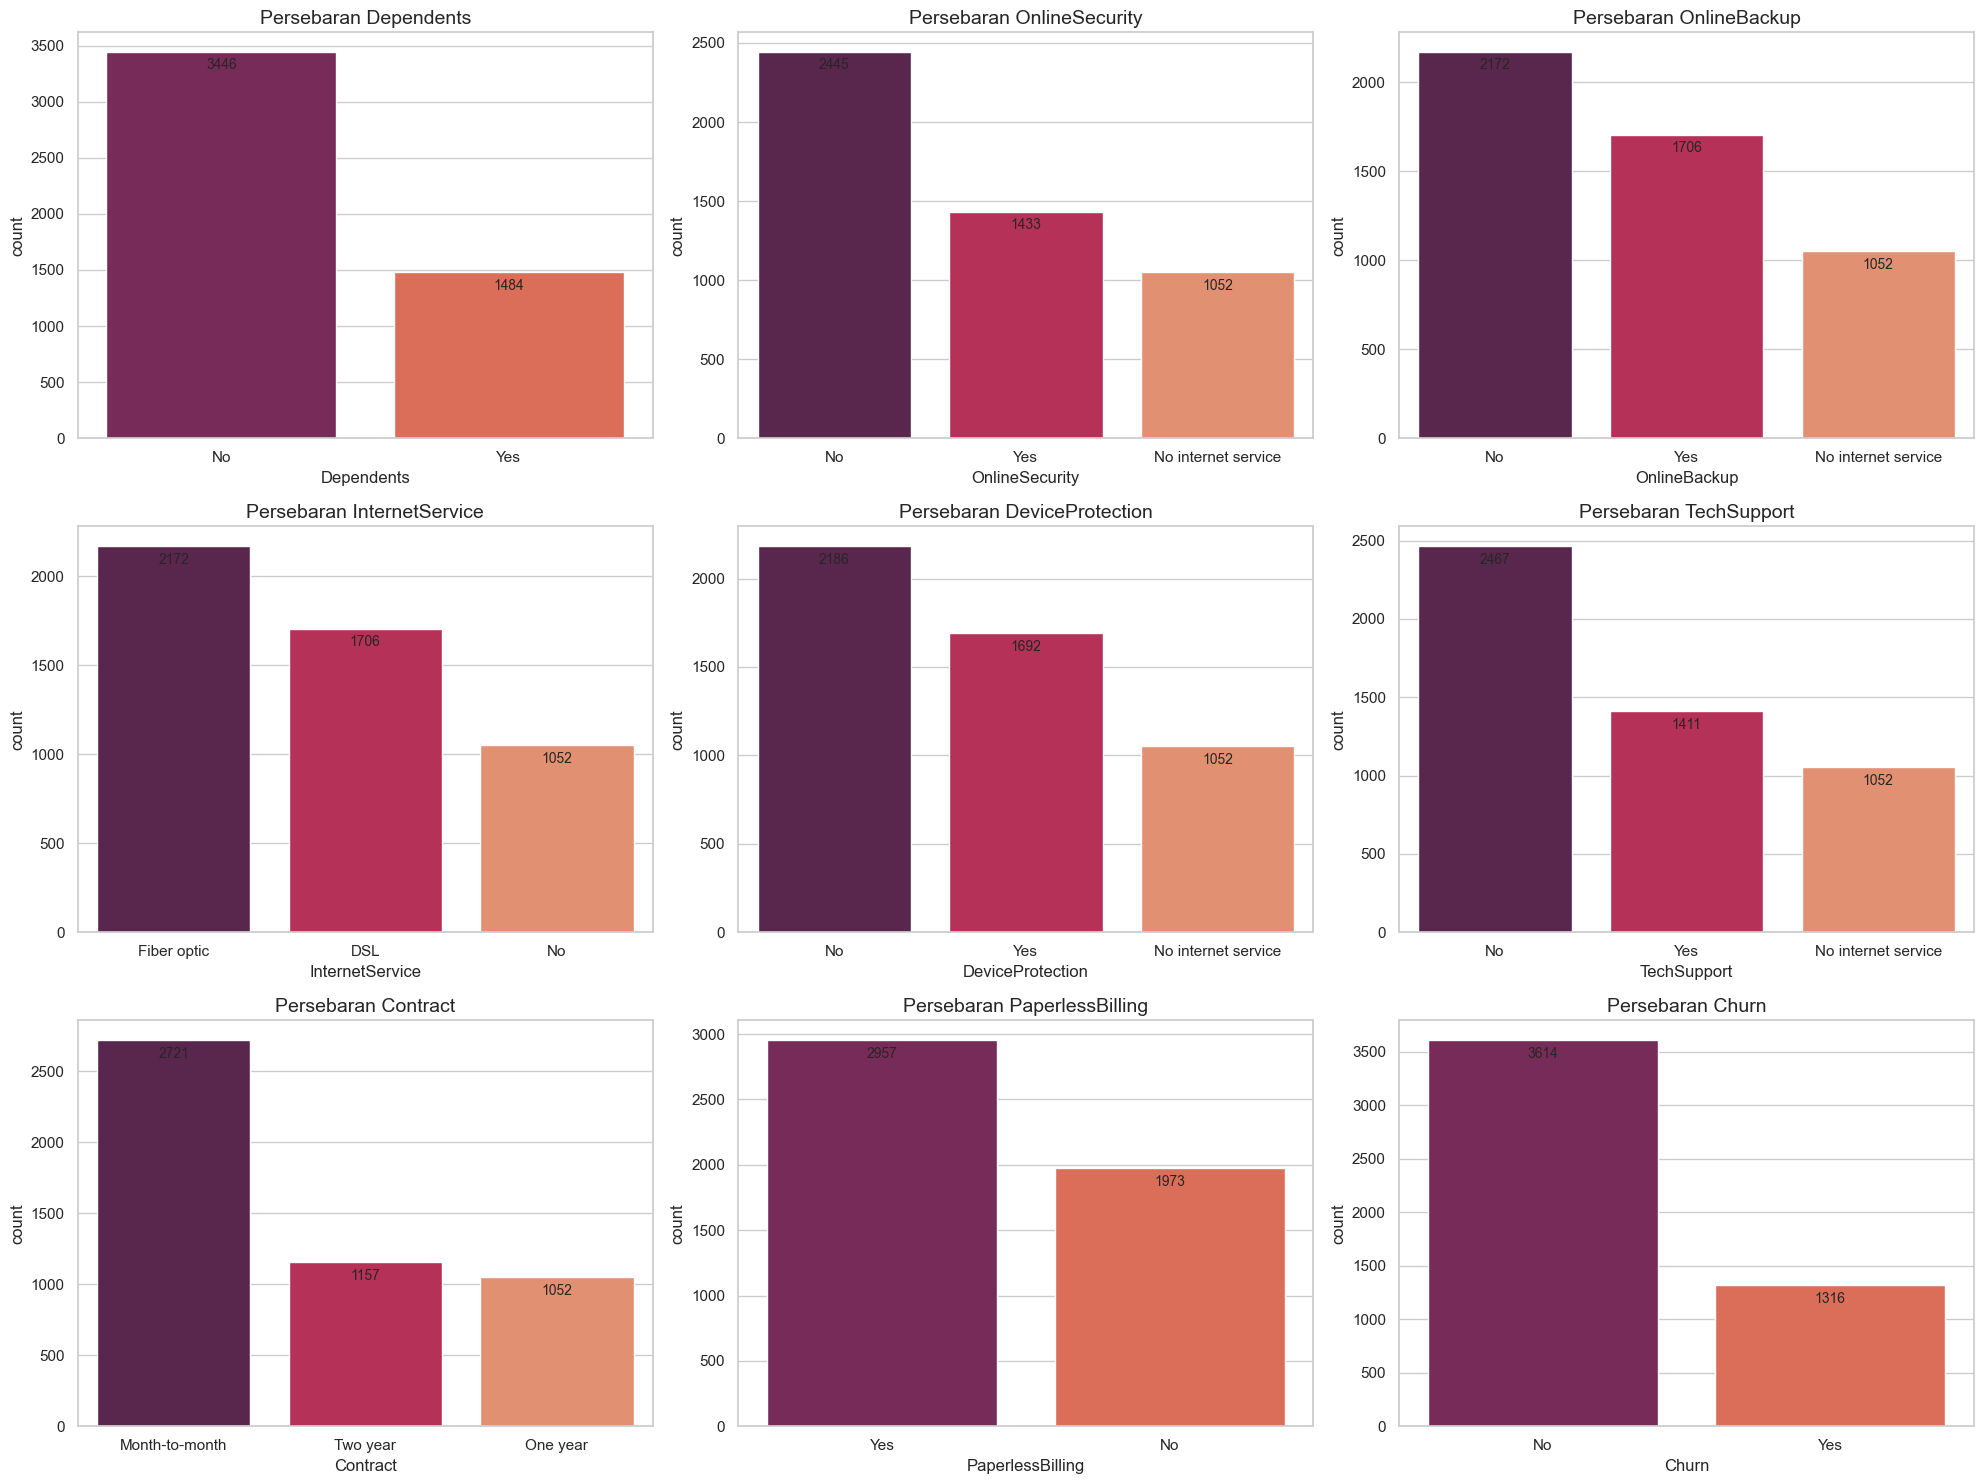

In [105]:
# Kategorikal Features
fig, axes = plt.subplots(3, 3, figsize=(20, 15)) 
for i, j in zip(categorical_features, axes.flatten()):
    ax = sns.countplot(data=df, x= i, ax= j, order=df[i].value_counts().index,palette='rocket')
    ax.set_title(f'Persebaran {i}',size = 14)
    ax.bar_label(ax.containers[0], padding= -15, size=10)
    plt.tight_layout()

plt.show()

Dari grafik diatas dapat kita lihat : 
- Mayoritas customer tidak memiliki `Depends` atau tanggungan
- Mayoritas customer tidak menggunakan layanan `OnlineSecurity`,`OnlineBackup`,`DeviceProtection`,`TechSupport`.
- Banyak customer menggunakan `InternetService` berupa Fiber Optik paling banyak dan yang paling sedikit adalah tidak menggunakan layanan internet
- Sebanyak 2957 customer menggunakan `PaperlessBilling`.
- Berdasarkan `Contract` mayoritas customer memilih type contract Month-to-Month
- Pada grafik diatas Mayoritas pelanggan adalah tidak churn

## **Data Cleaning, Feature Selection and Feature Engineering**

### **Replace Value**

In [106]:
df_modeling = df.copy()

Karena fokus utama kita adalah meminimalisir pelanggan yang churn maka kita akan mengubah value pada kolom `Churn` yaitu : 
- Yes (Berhenti berlangganan) -- > 1
- No (Tidak Berhenti berlangganan) -- > 0

In [107]:
# Mengubah value yes menjadi 1 dan no menjadi 0
df_modeling['Churn'] = np.where(df_modeling['Churn']=='Yes',1,0)

In [108]:
# Mengecek penggunaan layanan `OnlineSecurity, OnlineBackup, DeviceProtection` dan Tech Support
df_no_internet = df_modeling[df_modeling['InternetService']=='No']

listItem = []
for col in df_no_internet.columns[2:7] :
    listItem.append( [col, df_no_internet[col].nunique(), df_no_internet.sort_values(col)[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Values'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Values
0,OnlineSecurity,1,[No internet service]
1,OnlineBackup,1,[No internet service]
2,InternetService,1,[No]
3,DeviceProtection,1,[No internet service]
4,TechSupport,1,[No internet service]


In [109]:
# Mengubah value No internet service menjadi No
df_modeling = df_modeling.replace('No internet service','No')

### **Check Missing Value**

In [110]:
df_modeling.isna().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

### **Check Duplicated Data**

In [111]:
# Checking Nilai Duplikate
df_modeling.duplicated().sum()

77

In [112]:
df_modeling.shape

(4930, 11)

In [113]:
# Drop Nilai Duplicate
df_modeling = df_modeling.drop_duplicates() 

In [114]:
df_modeling.shape

(4853, 11)

Terdapat nilai duplikat sebanyak 77,Sebelum menghapus nilai duplikat terdapat 4930 baris setelah kita menghapus nilai duplikat terdapat 4853 baris

### **Handling Outlier**

In [115]:
# mencari nilai lower dan upper fence pada masing-masing kolom numerikal

list_lower = []
list_upper = []
number_lower = []
number_inside = []
number_upper = []
percentage_outlier = []

for feature in numerical_features: 
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    lower_fence = df[feature].quantile(0.25) - 1.5*IQR
    upper_fence = df[feature].quantile(0.75) + 1.5*IQR
    list_lower.append(lower_fence)
    list_upper.append(upper_fence)
    number_lower.append(len(df[df[feature]<lower_fence]))
    number_inside.append(len(df[(df[feature]>=lower_fence) & (df[feature]<=upper_fence)]))
    number_upper.append(len(df[df[feature]>upper_fence]))
    percentage_outlier.append(round((len(df[df[feature]<lower_fence]) + len(df[df[feature]>upper_fence])) / len(df)  *100, 2))

outliers = pd.DataFrame({
    'Kolom' : numerical_features,
    'Lower' : list_lower,
    'Upper' : list_upper,
    '# Lower' : number_lower,
    '# Inside' : number_inside,
    '# Upper' : number_upper,
    '% Outlier' : percentage_outlier
})

outliers

,Kolom,Lower,Upper,# Lower,# Inside,# Upper,% Outlier
0,tenure,-60.00,124.00,0,4930,0,0.0
1,MonthlyCharges,-42.15,169.05,0,4930,0,0.0


Tidak terdapat Outlier pada features numerikal

## **Data Analysis**

### **Numerical vs Features**

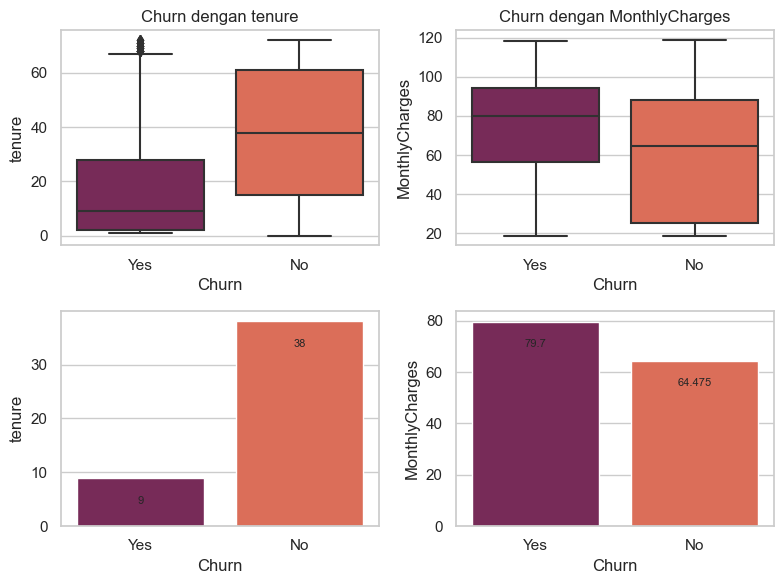

In [116]:
# Menampilkan barplot dan boxplot antara Numerical Features dan Target
plt.figure(figsize=(8, 6))
plotnumber = 1


for feature in numerical_features:
    ax = plt.subplot(2,2, plotnumber)
    sns.boxplot(y=feature, x='Churn', data=df,palette='rocket');
    plt.title(f'Churn dengan {feature}')
    plt.tight_layout()
    plotnumber = plotnumber + 1

for feature in numerical_features:
    ax = plt.subplot(2, 2, plotnumber)
    sns.barplot(x = 'Churn', y = feature, data = df, estimator=np.median, errorbar=('ci', 0),palette='rocket')
    plt.ylabel(feature)
    ax.bar_label(ax.containers[0], padding= -20, size=8)  
    plotnumber += 1
    plt.tight_layout()


plt.show()

- Customer yang berhenti berlangganan atau *churn* memiliki mean dan median yang relatif lebih rendah di bandingkan yang tidak berhenti berlangganan `tenure`
- Customer yang berhenti berlangganan atau *churn* memiliki mean dan median yang relatif lebih tinggi di bandingkan yang tidak berhenti berlangganan `MonthlyCharges`
- Terdapat outlier pada kolom `tenure`

### **Categorical vs Features**

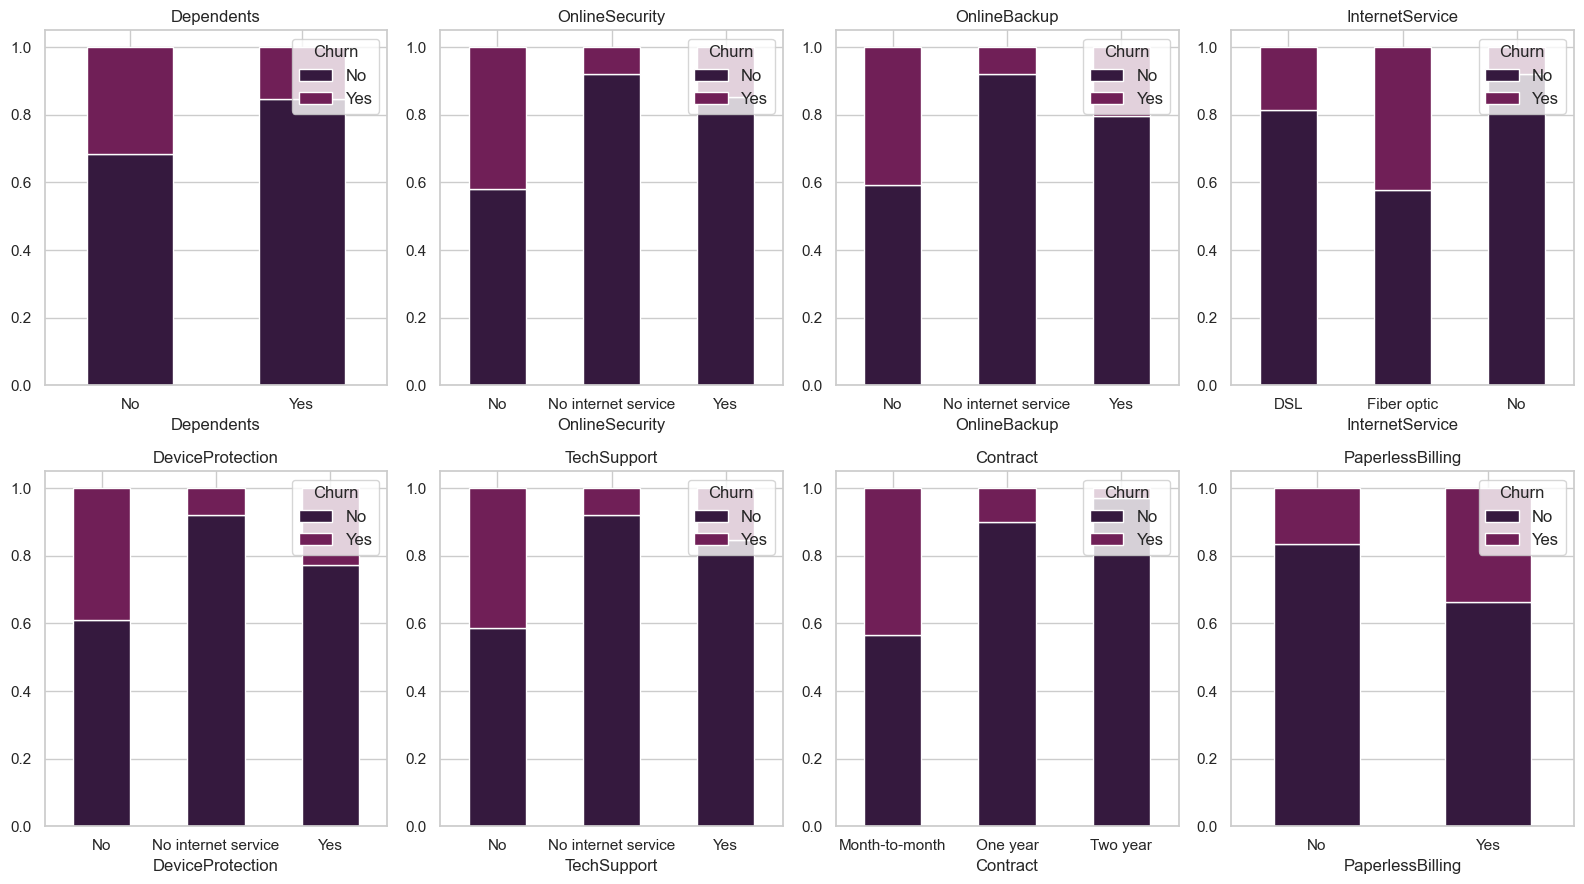

In [117]:
# Menampilkan barplot antara Categorical Features dan Target
plotnumber = 1
fig, axes = plt.subplots(2, 4, figsize=(16, 9))

sns.set_palette("rocket")

for feature, ax in zip(categorical_features[:-1], axes.flatten()):
    pd.crosstab(df[feature], df['Churn'], normalize='index').plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'{feature}', size=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.legend(loc='upper right', prop={'size': 12}, title='Churn')

plt.tight_layout()
plt.show()

Berdasarkan barplot diatas kita dapat menyimpulkan beberapa hal :
1. Customer yang tidak memiliki tanggungan atau `Dependent` cenderung untuk berhenti berlangganan atau *churn* dibandingkan Customer yang memiliki `Dependent` atau tanggungan 
2. Customer yang `InternetService`nya menggunakan Fiber optic cenderung untuk berhenti berlangganan atau *churn* dibandingkan `InternetService` yang menggunakan DSL atau tidak.
3. Customer yang tidak menggunakan layanan `OnlineSecurity, OnlineBackup, DeviceProtection` dan `TechSupport` cenderung untuk berhenti berlangganan atau *churn* dibandingkan yang menggunakan.
4. Customer yang `Contract`nya Month-to-month cenderung untuk berhenti berlangganan atau *churn* dibandingkan `Contract` yang lain. Bahkan yang `Contract`nya Two year hanya memiliki persentaseatau  churn sekitar yang sangat kecil.
5. Customer yang menggunakan `PaperlessBilling` cenderung untuk berhenti berlangganan atau *churn* dibandingkan dengan yang tidak menggunakan `PaperlessBilling`.

## **Modeling**

### **Data Preparation**

#### **Encoding**

In [118]:
pd.set_option('display.max_colwidth', None)
listItem = []
for col in categorical_features[:-1] :
    listItem.append( [col, df_modeling[col].nunique(), df_modeling.sort_values(col)[col].unique()])

tabel_katgorikal = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Values'],
                     data=listItem)
tabel_katgorikal

,Column Name,Number of Unique,Unique Values
0,Dependents,2,"[No, Yes]"
1,OnlineSecurity,2,"[No, Yes]"
2,OnlineBackup,2,"[No, Yes]"
3,InternetService,3,"[DSL, Fiber optic, No]"
4,DeviceProtection,2,"[No, Yes]"
5,TechSupport,2,"[No, Yes]"
6,Contract,3,"[Month-to-month, One year, Two year]"
7,PaperlessBilling,2,"[No, Yes]"


Memilih encoder yang tepat untuk kolom-kolom kategorikal : 
- Karena kolom `Dependents`,`OnlineSecurity`,`OnlineBackup`,`DeviceProtection`,`TechSupport`,`PaperlessBilling`,`PapelessBilling` hanya memiliki 2 unique dan value unique dari kolom kolom tersebut tidak memiliki urutan atau Kategorikal Ordinal kita akan memilih One Hot Encoding sebagai Encodernya.
- Mengganti kolom `InternetService` menggunakan Ordnial Encoding, karena fitur ini memiliki churn rate yang berbeda-beda. Untuk nilainya akan kita urutkan berdasarkan churn rate tertinggi dimana 'Fiber optic' akan kita ubah menjadi 3, 'DSL' kita ubah menjadi 2, dan sisanya 'No' diubah menjadi 1.
- Mengganti kolom `Contract` menjadi integer 1-3 dengan Ordinal Encoding, karena fitur ini adalah lama kontrak dalam satuan bulan dan tahun. Untuk nilainya akan kita urutkan berdasarkan churn rate tertinggi dimana 'Month-to-month' akan kita ubah menjadi 3, 'One year' kita ubah menjadi 2, dan sisanya 'Two year' diubah menjadi 1.

In [119]:
# Ordinal Maping
ordinal_mapping = [
    {'col':'InternetService', 'mapping':{None:0, 'Fiber optic':3, 'DSL':2, 'No':1}},
    {'col':'Contract', 'mapping':{None:0, 'Month-to-month':3, 'One year':2, 'Two year':1}}
]

In [120]:
# Encoding
transformer = ColumnTransformer([
    ('onehotencoder', OneHotEncoder(drop='first'), ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'PaperlessBilling']),
    ('ordinal', ce.OrdinalEncoder(cols=['InternetService', 'Contract'], mapping=ordinal_mapping), ['InternetService', 'Contract']),
], remainder='passthrough')

#### **Scaling**

Dalam pengembangan model machine learning, penerapan algoritma seperti **Logistic Regression** dan **K-Nearest Neighbors (KNN)** seringkali memerlukan normalisasi atau scaling data. Tujuan dari normalisasi ini adalah agar setiap fitur memiliki dampak yang sebanding terhadap target.Scaling menjadi krusial terutama untuk algoritma yang bergantung pada perhitungan jarak, seperti KNN. Tanpa normalisasi, variabel dengan skala besar dapat mendominasi kontribusi terhadap model, mengurangi kemampuan algoritma untuk memperlakukan setiap fitur dengan seimbang.

Dengan mempertimbangkan bahwa data pada kolom numerikal `tenure` dan `MonthlyCharges` tidak mengandung outlier, kita dapat menggunakan pendekatan **Min-Max** Scaling. Dengan normalisasi ini, skala seluruh fitur diatur dalam rentang yang seragam, memastikan bahwa setiap fitur memberikan kontribusi yang setara terhadap hasil prediksi.Sehingga, dengan mengimplementasikan scaling ini, diharapkan kinerja algoritma Logistic Regression dan KNN akan meningkat, memberikan hasil prediksi yang lebih baik.

In [121]:
# Define Scaler
robust = RobustScaler()
standard = StandardScaler()
minmax = MinMaxScaler()

#### **Data Proportion**

In [122]:
# Mengeck Proporsi Data
round(df['Churn'].value_counts() / len(df) * 100,2)

Churn
No     73.31
Yes    26.69
Name: count, dtype: float64

Pada dataset yang kita miliki adanya ketidakseimbangan yang ringan *mild imbalance* antara churn *yes* dan *no*, di mana proporsi kelas minoritas mencapai 26.69%, yang ini berada dalam rentang 20-40% dari total dataset. Untuk mengatasi masalahan ini, kita akan menerapkan metode resampling agar distribusi kelas menjadi lebih seimbang.

Pilihan metode resampling yang akan digunakan adalah Synthetic Minority Over-sampling Technique for Nominal and Continuous (SMOTENC). Alasan penggunaan metode ini adalah untuk menghindari potensi kehilangan informasi pada kelas mayoritas jika menggunakan undersampling, di mana data pada kelas mayoritas dapat terbuang. Selain itu, penduplikasian data yang telah ada sebelumnya dengan menggunakan Random Oversampling dapat menyebabkan overfitting.

### **Resampling**

In [123]:
# Resampling
resample = SMOTENC(random_state=0, categorical_features=[0, 2, 3, 4, 5, 6, 7, 8])

### **Define Features (X) and Target (y)**

Selanjutnya kita mendefinisikan Feature(X) dan Target (y) yang akan kita gunakan :
- Feature (X) : `Dependents, tenure, OnlineSecurity, OnlineBackup, InternetService, DeviceProtection, TechSupport, Contract, PaperlessBilling, MonthlyCharges`
- Target (y) : `Churn`

In [124]:
# Features (X)
X = df_modeling.drop(columns='Churn')

# Target (y)
y = df_modeling['Churn']

### **Data Spliting**

Dalam pemodelan ini, kita akan mengalokasikan ukuran uji sebesar 20% dari keseluruhan dataset dengan menggunakan parameter test_size=0.2. Hal ini dilakukan untuk mendapatkan dataset uji yang representatif. Mengingat tugas klasifikasi, di mana kita akan memprediksi data atau label yang bersifat kategorik, kita akan menerapkan metode stratifikasi dengan menggunakan parameter stratify=y. Tujuan dari penggunaan stratify ini adalah untuk memastikan bahwa proporsi nilai Churn pada set pelatihan (y_train) dan set uji (y_test) tetap seimbang.

In [125]:
# Data Spliting
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.2,
    random_state=0,
    stratify=y
)

In [126]:
# Check Proporsi data train
y_train.value_counts() / len(y_train)

Churn
0    0.734673
1    0.265327
Name: count, dtype: float64

In [127]:
# Check Proporsi data test
y_test.value_counts() / len(y_test)

Churn
0    0.734295
1    0.265705
Name: count, dtype: float64

### **Model Benchmarking**

Disini kita akan menggunakan/mencoba algoritma untuk mencari benchmark model dengan metode Cross Validation
- LogisticRegression
- KNeighborsClassifier
- DecisionTreeClassifier
- RandomForestClassifier
- AdaBoostClassifier
- GradientBoostingClassifier
- XGBClassifier
- CatBoostClassifier

Sesuai dengan metric evaluation yang sudah kita tentukan di awal kita akan menggunakan f2_score sebagai scoring.

In [128]:
# Define Benchmark Model
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
adaboost = AdaBoostClassifier(dtree, random_state=0)
gb = GradientBoostingClassifier(random_state=0)
xgbc = XGBClassifier(random_state=0, verbosity=0)
cat = CatBoostClassifier(verbose=False,random_state=0)

In [129]:
skfold = StratifiedKFold(n_splits=5)

In [130]:
f2_score = make_scorer(fbeta_score, beta=2)

### **Model Benchmarking - Hyper Parameter : Cross Validation**

**Without Resampling**

In [131]:
# Define imbalanced treatment method
models = [logreg, knn, dtree, rf, adaboost, gb, xgbc,cat]

list_model = []
list_score = []
list_mean = []
list_std = []


for model in models:

    pipe_model = Pipeline([
        ('transformer', transformer),
        ('scaler',minmax),
        ('model', model)
    ])

    model_cv = cross_val_score(
        estimator=pipe_model,
        X=X_train,
        y=y_train,
        cv=skfold,
        scoring=f2_score,
        n_jobs=-1
    )
  
    list_score.append(model_cv.round(3))
    list_mean.append(model_cv.mean().round(3))
    list_std.append(model_cv.std().round(3))

In [132]:
model_without_sampling = pd.DataFrame({
    'model' : ['Logistic Regression', 'KNeighbors Classifier', 'DecisionTree Classifier', 'RandomForest Classifier', 'AdaBoostClassifier', 'GradientBoostingClassifier', 'XGBClassifier','CatBoostClassifier'],
    'list_mean_f2': list_mean,
    'list_std_f2': list_std,
    'list_score' : list_score
}).sort_values(by='list_mean_f2',ascending=False)
model_without_sampling

,model,list_mean_f2,list_std_f2,list_score
0,Logistic Regression,0.539,0.032,"[0.538, 0.516, 0.538, 0.597, 0.506]"
5,GradientBoostingClassifier,0.539,0.026,"[0.561, 0.559, 0.535, 0.549, 0.489]"
7,CatBoostClassifier,0.529,0.011,"[0.534, 0.534, 0.526, 0.542, 0.511]"
6,XGBClassifier,0.522,0.019,"[0.505, 0.5, 0.519, 0.543, 0.544]"
3,RandomForest Classifier,0.500,0.019,"[0.503, 0.525, 0.485, 0.474, 0.515]"
4,AdaBoostClassifier,0.500,0.009,"[0.492, 0.512, 0.506, 0.488, 0.502]"
1,KNeighbors Classifier,0.494,0.015,"[0.499, 0.511, 0.488, 0.505, 0.469]"
2,DecisionTree Classifier,0.484,0.023,"[0.506, 0.486, 0.445, 0.475, 0.507]"


Dari tabel yang diberikan, kita dapat menarik beberapa insight terkait performa berbagai model klasifikasi yang dievaluasi menggunakan metrik F2 Score,f2_score paling tinggi adalah Logistic Regression dan Gradient Boosting Classifier dan Skor terendah adalah DecisionTree Classifier,dan untuk rata-rata scorenya hanya menyentuh disekitar 0.521.Tetapi Score di atas masih tergolong cukup rendah jika tidak menggunakan resampler oleh karena itu kita akan mencoba kembali dengan menggunakan resampler SMOTENC

**With Resampling**

In [133]:
# Define imbalanced treatment method
models = [logreg, knn, dtree, rf, adaboost, gb, xgbc,cat]

list_score = []
list_mean = []
list_std = []


for model in models:

    pipe_model = Pipeline([
        ('transformer', transformer),
        ('scaler',minmax),
        ('resampler', resample),
        ('model', model)
    ])

    model_cv = cross_val_score(
        estimator=pipe_model,
        X=X_train,
        y=y_train,
        cv=skfold,
        scoring=f2_score,
        n_jobs=-1
    )
    
    list_score.append(model_cv.round(3).tolist())
    list_mean.append(model_cv.mean().round(3))
    list_std.append(model_cv.std().round(3))

In [134]:
model_with_sampling = pd.DataFrame({
    'model' : ['Logistic Regression', 'KNeighbors Classifier', 'DecisionTree Classifier', 'RandomForest Classifier', 'AdaBoostClassifier', 'GradientBoostingClassifier', 'XGBClassifier','CatBoostClassifier'],
    'list_mean_f2': list_mean,
    'list_std_f2': list_std,
    'list_score' : list_score
}).sort_values(by='list_mean_f2',ascending=False)
model_with_sampling

,model,list_mean_f2,list_std_f2,list_score
0,Logistic Regression,0.701,0.019,"[0.68, 0.714, 0.683, 0.697, 0.731]"
5,GradientBoostingClassifier,0.672,0.023,"[0.634, 0.684, 0.668, 0.706, 0.669]"
7,CatBoostClassifier,0.652,0.025,"[0.62, 0.658, 0.633, 0.694, 0.653]"
6,XGBClassifier,0.620,0.022,"[0.588, 0.615, 0.612, 0.657, 0.627]"
1,KNeighbors Classifier,0.611,0.022,"[0.632, 0.584, 0.589, 0.636, 0.615]"
3,RandomForest Classifier,0.577,0.012,"[0.576, 0.579, 0.56, 0.598, 0.571]"
4,AdaBoostClassifier,0.551,0.004,"[0.547, 0.555, 0.546, 0.553, 0.554]"
2,DecisionTree Classifier,0.546,0.025,"[0.568, 0.569, 0.512, 0.562, 0.519]"


Setelah kita menambahkan resampler dengan SMOTENC ternyata terjadi peningkatan rata-rata f2_score yang cukup signifikan untuk Logistic Regression mengalami peningkatan sebesar lebih dari 0.19 dan untuk algoritma lainnya juga memilliki peningkatan yang cukup baik,Oleh karena itu dapat disumpulkan untuk SMOTENC dapat meningkatkan performa algoritma klasifikasi,maka kita akan menggunakan oversampling untuk setiap modelnya.

### **Predict Benchmark Model to Test Set**

In [135]:
models = {
    'Logistic Regression': LogisticRegression(random_state=0),
    'KNeighbors Classifier': KNeighborsClassifier(),
    'DecisionTree Classifier': DecisionTreeClassifier(random_state=0),
    'RandomForest Classifier': RandomForestClassifier(random_state=0),
    'AdaBoostClassifier': AdaBoostClassifier(base_estimator=dtree, random_state=0),  
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=0),
    'XGBClassifier': XGBClassifier(random_state=0),
    'CatBoostClassifier': CatBoostClassifier(random_state=0)
}

score = []

for model_name, model in models.items():

    pipeline = Pipeline([
        ('transformer', transformer),
        ('resampler', resample),
        ('scaler', minmax),
        ('model', model)
    ])

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # fitting
    pipeline.fit(X_train, y_train)

    # predict
    y_pred = pipeline.predict(X_test)

    # recall score
    score.append([fbeta_score(y_test, y_pred, beta=2)])

score_before_tuning = pd.DataFrame(score, columns=['f2_score'], index=models.keys()).sort_values('f2_score',ascending=False)
score_before_tuning

Learning rate set to 0.021642
0:	learn: 0.6771455	total: 13ms	remaining: 13s
1:	learn: 0.6623468	total: 24.7ms	remaining: 12.3s
2:	learn: 0.6503491	total: 37.5ms	remaining: 12.5s
3:	learn: 0.6385346	total: 49.4ms	remaining: 12.3s
4:	learn: 0.6263533	total: 62.4ms	remaining: 12.4s
5:	learn: 0.6161914	total: 74.9ms	remaining: 12.4s
6:	learn: 0.6062471	total: 87.1ms	remaining: 12.4s
7:	learn: 0.5968617	total: 98.7ms	remaining: 12.2s
8:	learn: 0.5874793	total: 111ms	remaining: 12.2s
9:	learn: 0.5780556	total: 124ms	remaining: 12.3s
10:	learn: 0.5690818	total: 137ms	remaining: 12.3s
11:	learn: 0.5618370	total: 150ms	remaining: 12.3s
12:	learn: 0.5557318	total: 160ms	remaining: 12.1s
13:	learn: 0.5483558	total: 172ms	remaining: 12.1s
14:	learn: 0.5407032	total: 185ms	remaining: 12.1s
15:	learn: 0.5342968	total: 198ms	remaining: 12.2s
16:	learn: 0.5275914	total: 209ms	remaining: 12.1s
17:	learn: 0.5211641	total: 221ms	remaining: 12.1s
18:	learn: 0.5160686	total: 233ms	remaining: 12s
19:	learn

,f2_score
Logistic Regression,0.705631
GradientBoostingClassifier,0.649547
CatBoostClassifier,0.630769
XGBClassifier,0.618238
KNeighbors Classifier,0.584465
RandomForest Classifier,0.571767
DecisionTree Classifier,0.569909
AdaBoostClassifier,0.542636


Dari informasi diatas, kita dapat menilai bahwa Logistic Regression, diikuti oleh beberapa model ensemble seperti GradientBoostingClassifier dan CatBoostClassifier, memiliki hasil f2_score yang baik pada test_set,Oleh karena itu selanjutnya kita akan melakukan hypertuning untuk menemukan score yang lebih baik lagi dengan benchmark model kita yaitu : 
- Logistic Regression
- GradientBoostingClassifier
- CatBoostClassifier

### **Hyperparameter Tuning : Logistic Regression**

In [136]:
# Hyperparameter Tuning : Logistic Regression
hyperparam_space_logreg= {
    'model__C':[100, 10, 1, 0.1, 0.01, 0.001],
    'model__solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],   
}                                                         

# Pipeline
pipe_model_logreg = Pipeline([
    ('preprocess', transformer),
    ('scaler', minmax),
    ('resampler', resample),
    ('model', logreg)
])

# Define Randomized Search
skfold = StratifiedKFold(n_splits = 5)

random_search_logreg = RandomizedSearchCV(
    estimator=pipe_model_logreg,
    param_distributions=hyperparam_space_logreg,
    cv=skfold,
    scoring=f2_score,
    n_jobs=-1,
    random_state=0,
    n_iter=500                 
)

In [137]:
# fitting 
random_search_logreg.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehotencoder',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Dependents',
                                                                                'OnlineSecurity',
                                                                                'OnlineBackup',
                                                                                'DeviceProtection',
                                                                                'TechSupport',
                                                                                'PaperlessBilling']),
                                                                              ('ordinal',
                                                                               OrdinalEncoder(c...
                                             ('scaler', MinMaxScaler()),
                                             ('resampler',
                                              SMOTENC(categorical_features=[0,
                                                                            2,
                                                                            3,
                                                                            4,
                                                                            5,
                                                                            6,
                                                                            7,
                                                                            8],
                                                      random_state=0)),
                                             ('model',
                                              LogisticRegression(random_state=0))]),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'model__C': [100, 10, 1, 0.1, 0.01,
                                                     0.001],
                                        'model__solver': ['lbfgs', 'liblinear',
                                                          'newton-cg',
                                                          'newton-cholesky',
                                                          'sag', 'saga']},
                   random_state=0, scoring=make_scorer(fbeta_score, beta=2))

In [138]:
# best params
random_search_logreg.best_params_

{'model__solver': 'liblinear', 'model__C': 0.001}

In [139]:
best_model_logreg = random_search_logreg.best_estimator_

In [140]:
# score f2_score terbaik
random_search_logreg.best_score_

0.7301414955045649

Hyperparameter Logistic Regression terbaik dari hasil Randomize search --> `solver` = 'liblinear',`C` = 0.001, dengan score terbaiknya adalah 0.7301414955045649 Nilai ini mengalami kenaikan sekitar 0.03 ketika sebelum melakukan Hyperparameter Tuning.

In [141]:
pd.DataFrame(random_search_logreg.cv_results_).sort_values('mean_test_score', ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__solver,param_model__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
31,1.333584,0.125505,0.030241,0.006098,liblinear,0.001,"{'model__solver': 'liblinear', 'model__C': 0.001}",0.742574,0.729251,0.730428,0.730016,0.718439,0.730141,0.007648,1
25,1.372472,0.175666,0.038515,0.013122,liblinear,0.01,"{'model__solver': 'liblinear', 'model__C': 0.01}",0.742321,0.723906,0.743872,0.722175,0.701377,0.726730,0.015546,2
20,1.382776,0.181234,0.036395,0.005881,newton-cg,0.1,"{'model__solver': 'newton-cg', 'model__C': 0.1}",0.725664,0.727903,0.732345,0.706239,0.674847,0.713400,0.021248,3
23,1.353067,0.161148,0.032409,0.003582,saga,0.1,"{'model__solver': 'saga', 'model__C': 0.1}",0.725664,0.727903,0.732345,0.706239,0.674847,0.713400,0.021248,3
22,1.504048,0.177286,0.035687,0.007574,sag,0.1,"{'model__solver': 'sag', 'model__C': 0.1}",0.725664,0.727903,0.732345,0.706239,0.674847,0.713400,0.021248,3


Dari tabel diatas dengan rata-rata 5 f2_score tertinggi dapat dilihat bahwa di dominasi oleh `solver` : liblinear,dan saga. Sedangkan untuk `C` diisi dengan nilai 0.1.

Selanjutnya kita akan mencoba Tuning Gradient Boosting

### **Hyperparameter Tuning : GradientBoosting**

In [142]:
# kedalaman pohon
max_depth = list(np.arange(1,15))

# learning rate
learning_rate = list(np.arange(1,100)/100)

# jumlah pohon
n_estimators = list(np.arange(1,100))

# jumlah baris train set tiap pohon (% dari total baris train set)
subsample = list(np.arange(2,10)/10)

# jumlah feature yang digunakan untuk pertimbangan splitting (% dari total kolom train set)
max_features = list(np.arange(1,30))

# Hyperparameter space GBC
hyperparam_space_gbc = {
    'model__max_depth':max_depth , 
    'model__learning_rate':learning_rate,
    'model__n_estimators':n_estimators,
    'model__subsample':subsample,
    'model__max_features':max_features
}

In [143]:
# Create the algorithm chains
random_search_gb = Pipeline([
    ('transformer',transformer),
    ('scaler',minmax),
    ('balancing',resample),
    ('model', gb)
    ])

# Hyperparameter tuning
random_search_gb = RandomizedSearchCV(
    random_search_gb, 
    param_distributions = hyperparam_space_gbc, 
    cv = 5, 
    scoring = f2_score, 
    n_jobs = -1, 
    random_state=0,
    n_iter=100
)

In [144]:
random_search_gb.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehotencoder',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Dependents',
                                                                                'OnlineSecurity',
                                                                                'OnlineBackup',
                                                                                'DeviceProtection',
                                                                                'TechSupport',
                                                                                'PaperlessBilling']),
                                                                              ('ordinal',
                                                                               OrdinalEncoder(cols=['InternetService',
                                                                                                    'Contract'],
                                                                                              mapping=[{'col': 'Inter...
                                        'model__max_depth': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14],
                                        'model__max_features': [1, 2, 3, 4, 5,
                                                                6, 7, 8, 9, 10,
                                                                11, 12, 13, 14,
                                                                15, 16, 17, 18,
                                                                19, 20, 21, 22,
                                                                23, 24, 25, 26,
                                                                27, 28, 29],
                                        'model__n_estimators': [1, 2, 3, 4, 5,
                                                                6, 7, 8, 9, 10,
                                                                11, 12, 13, 14,
                                                                15, 16, 17, 18,
                                                                19, 20, 21, 22,
                                                                23, 24, 25, 26,
                                                                27, 28, 29, 30, ...],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=0, scoring=make_scorer(fbeta_score, beta=2))

In [145]:
# best params
random_search_gb.best_params_

{'model__subsample': 0.2,
 'model__n_estimators': 4,
 'model__max_features': 23,
 'model__max_depth': 1,
 'model__learning_rate': 0.28}

Hyperparameter Gradient Boosting Classifier terbaik dari hasil Randomize search --> `subsample` = 0.2,`n_estimators` = 4,`max_features` = 23,`max_depth` = 1, `learning_rate` = 0.28 dengan score terbaiknya adalah 0.7403304743602173 Nilai ini mengalami kenaikan yang cukup baik sekitar 0.9 ketika sebelum melakukan Hyperparameter Tuning.

In [146]:
# score f2_score terbaik
random_search_gb.best_score_

0.7403304743602173

In [147]:
best_model_gb = random_search_gb.best_estimator_

In [148]:
pd.DataFrame(random_search_gb.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__n_estimators,param_model__max_features,param_model__max_depth,param_model__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
15,1.402206,0.131992,0.033845,0.007646,0.2,4,23,1,0.28,"{'model__subsample': 0.2, 'model__n_estimators': 4, 'model__max_features': 23, 'model__max_depth': 1, 'model__learning_rate': 0.28}",0.777244,0.736342,0.739269,0.727848,0.720950,0.740330,0.019550,1
4,1.499090,0.168970,0.033918,0.010365,0.5,25,17,1,0.17,"{'model__subsample': 0.5, 'model__n_estimators': 25, 'model__max_features': 17, 'model__max_depth': 1, 'model__learning_rate': 0.17}",0.763293,0.739949,0.725945,0.711835,0.706897,0.729584,0.020429,2
55,1.794524,0.220466,0.033147,0.009108,0.6,73,3,1,0.09,"{'model__subsample': 0.6, 'model__n_estimators': 73, 'model__max_features': 3, 'model__max_depth': 1, 'model__learning_rate': 0.09}",0.760870,0.740260,0.725456,0.708729,0.709930,0.729049,0.019645,3
48,1.377328,0.122709,0.033780,0.010690,0.3,22,10,1,0.53,"{'model__subsample': 0.3, 'model__n_estimators': 22, 'model__max_features': 10, 'model__max_depth': 1, 'model__learning_rate': 0.53}",0.744961,0.727352,0.718016,0.724891,0.713020,0.725648,0.010901,4
34,1.613778,0.191500,0.034293,0.007997,0.8,24,15,1,0.64,"{'model__subsample': 0.8, 'model__n_estimators': 24, 'model__max_features': 15, 'model__max_depth': 1, 'model__learning_rate': 0.64}",0.748899,0.732456,0.703540,0.715540,0.709877,0.722062,0.016507,5


Dari tabel diatas dengan rata-rata 5 f2_score tertinggi dapat dilihat bahwa di dominasi oleh `subsample` ada pada rentang  0.2 - 0.8, `n_estimatoer` diisi dengan nilai 4 - 73,`max_features` ada pada rentang 3-23,`max_depth` hanya ada nilai 1, dan `learning_rate` ada pada rentang 0.09 - 0.64.

Selanjutnya kita akan mencoba Tuning Cat Boost Classifier

### **Hyperparameter Tuning : CatBoostClassifier**

In [149]:
catboost_params = {
    'model__learning_rate': stats.uniform(0.01, 0.2),
    'model__depth': stats.randint(1, 15),
    'model__iterations': stats.randint(1, 100),
    'model__l2_leaf_reg': stats.uniform(1, 15),
    'model__subsample': stats.uniform(0.5, 0.5),
    'model__bagging_temperature': stats.uniform(0, 1),
    'model__scale_pos_weight' : [2, 3, 5, 10, 20, 30]
}

pipe_model_cat = Pipeline([
    ('tansformer', transformer),
    ('scaler', minmax),
    ('balancing',resample),
    ('model', cat)
])


random_search_cat = RandomizedSearchCV(
    pipe_model_cat,
    param_distributions=catboost_params,
    n_iter=100,  
    scoring=f2_score,  
    cv=5,  
    random_state=0,
    n_jobs=-1
)

In [150]:
random_search_cat.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('tansformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehotencoder',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Dependents',
                                                                                'OnlineSecurity',
                                                                                'OnlineBackup',
                                                                                'DeviceProtection',
                                                                                'TechSupport',
                                                                                'PaperlessBilling']),
                                                                              ('ordinal',
                                                                               OrdinalEncoder(cols=['InternetService',
                                                                                                    'Contract'],
                                                                                              mapping=[{'col': 'Intern...
                                        'model__l2_leaf_reg': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000016BE7024690>,
                                        'model__learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000016BE6A4EF50>,
                                        'model__scale_pos_weight': [2, 3, 5, 10,
                                                                    20, 30],
                                        'model__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000016BE7024950>},
                   random_state=0, scoring=make_scorer(fbeta_score, beta=2))

In [151]:
# best params
random_search_cat.best_params_

{'model__bagging_temperature': 0.8817202123338397,
 'model__depth': 3,
 'model__iterations': 53,
 'model__l2_leaf_reg': 6.614442749813741,
 'model__learning_rate': 0.15975765150802665,
 'model__scale_pos_weight': 3,
 'model__subsample': 0.5859265495238215}

In [152]:
# score recall terbaik
random_search_cat.best_score_

0.7541857947451651

Hyperparameter Cat Boosting Classifier terbaik dari hasil Randomize search --> `bagging_temperature` = 0.8817202123338397,`depth` = 3,`iterations` = 53 `l2_leaf_reg` = 6.614442749813741,`learning_rate` = 0.15975765150802665 , `scale_pos_weight` = 3,`subsample`= 0.5859265495238215 dengan score terbaiknya adalah 0.7541857947451651 Nilai ini mengalami kenaikan sekitar 0.12 ketika sebelum melakukan Hyperparameter Tuning.

In [153]:
best_model_cat = random_search_cat.best_estimator_

In [154]:
pd.DataFrame(random_search_cat.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__bagging_temperature,param_model__depth,param_model__iterations,param_model__l2_leaf_reg,param_model__learning_rate,param_model__scale_pos_weight,param_model__subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
78,1.788742,0.135270,0.045933,0.010606,0.88172,3,53,6.614443,0.159758,3,0.585927,"{'model__bagging_temperature': 0.8817202123338397, 'model__depth': 3, 'model__iterations': 53, 'model__l2_leaf_reg': 6.614442749813741, 'model__learning_rate': 0.15975765150802665, 'model__scale_pos_weight': 3, 'model__subsample': 0.5859265495238215}",0.785320,0.743243,0.751174,0.751192,0.740000,0.754186,0.016176,1
30,2.394233,0.118167,0.060089,0.019812,0.463451,6,81,10.123793,0.129331,3,0.582347,"{'model__bagging_temperature': 0.46345097738448293, 'model__depth': 6, 'model__iterations': 81, 'model__l2_leaf_reg': 10.123792987810194, 'model__learning_rate': 0.12933108125901063, 'model__scale_pos_weight': 3, 'model__subsample': 0.5823470782489564}",0.782504,0.741491,0.744094,0.756337,0.733496,0.751585,0.017110,2
87,1.774801,0.223945,0.057233,0.017231,0.510629,12,1,10.335766,0.152106,3,0.838557,"{'model__bagging_temperature': 0.51062890693618, 'model__depth': 12, 'model__iterations': 1, 'model__l2_leaf_reg': 10.335766428490073, 'model__learning_rate': 0.15210568054446913, 'model__scale_pos_weight': 3, 'model__subsample': 0.838557199916609}",0.780526,0.732265,0.734958,0.754496,0.752688,0.750987,0.017292,3
2,3.153277,0.234851,0.049055,0.006711,0.528895,9,82,14.88395,0.024207,3,0.824086,"{'model__bagging_temperature': 0.5288949197529045, 'model__depth': 9, 'model__iterations': 82, 'model__l2_leaf_reg': 14.883949574389916, 'model__learning_rate': 0.02420721163957739, 'model__scale_pos_weight': 3, 'model__subsample': 0.8240859360255985}",0.771297,0.735409,0.740599,0.758648,0.745268,0.750244,0.013052,4
86,3.280496,0.302637,0.065273,0.027498,0.862319,7,92,4.804638,0.099227,5,0.756226,"{'model__bagging_temperature': 0.8623185468359024, 'model__depth': 7, 'model__iterations': 92, 'model__l2_leaf_reg': 4.804637863852341, 'model__learning_rate': 0.09922710253184039, 'model__scale_pos_weight': 5, 'model__subsample': 0.7562258293795436}",0.774865,0.734949,0.739464,0.754717,0.745268,0.749853,0.014145,5


### **Performance in Test Set Before Hyper Tuning**

In [155]:
models = {
    'LogisticRegresion': LogisticRegression(random_state=0),
    'CatBoosting': CatBoostClassifier(random_state=0),
    'GradientBoosting': GradientBoostingClassifier(random_state=0)
}

score = []

for i in models:

    model = Pipeline([
        ('transformer', transformer),
        ('resampler', resample),
        ('model', models[i])
    ])

    # fitting
    model.fit(X_train, y_train)

    # predict
    y_pred = model.predict(X_test)

    # recall score
    score.append([fbeta_score(y_test, y_pred, beta=2)])

score_before_tuning = pd.DataFrame(
    score, columns=['F2 score'], index=models.keys())
score_before_tuning

Learning rate set to 0.021642
0:	learn: 0.6771455	total: 11.4ms	remaining: 11.4s
1:	learn: 0.6623468	total: 22.1ms	remaining: 11s
2:	learn: 0.6503491	total: 30.5ms	remaining: 10.1s
3:	learn: 0.6385346	total: 38.2ms	remaining: 9.5s
4:	learn: 0.6263533	total: 45.3ms	remaining: 9.01s
5:	learn: 0.6161914	total: 52.9ms	remaining: 8.76s
6:	learn: 0.6062471	total: 75.4ms	remaining: 10.7s
7:	learn: 0.5968617	total: 83.1ms	remaining: 10.3s
8:	learn: 0.5874793	total: 93.1ms	remaining: 10.3s
9:	learn: 0.5780556	total: 102ms	remaining: 10.1s
10:	learn: 0.5690818	total: 110ms	remaining: 9.89s
11:	learn: 0.5618370	total: 119ms	remaining: 9.76s
12:	learn: 0.5557318	total: 125ms	remaining: 9.46s
13:	learn: 0.5483558	total: 138ms	remaining: 9.75s
14:	learn: 0.5407032	total: 148ms	remaining: 9.71s
15:	learn: 0.5342968	total: 158ms	remaining: 9.7s
16:	learn: 0.5275914	total: 169ms	remaining: 9.76s
17:	learn: 0.5211641	total: 177ms	remaining: 9.63s
18:	learn: 0.5160686	total: 188ms	remaining: 9.7s
19:	lea

,F2 score
LogisticRegresion,0.702067
CatBoosting,0.630769
GradientBoosting,0.649547


### **Performance in Test Set After Hyper Tuning**

In [156]:
# best model Logistic Regression
logreg_after_tuning = random_search_logreg.best_estimator_


# fitting
logreg_after_tuning.fit(X_train, y_train)

# # predict
y_pred_logreg_tuning = logreg_after_tuning.predict(X_test)

# # recall score
f2score_logreg_tuning = fbeta_score(y_test, y_pred_logreg_tuning, beta=2)
f2score_logreg_tuning

0.711436170212766

In [157]:
# best model Gradient Boosting
gbc_after_tuning = random_search_gb.best_estimator_

# fitting
gbc_after_tuning.fit(X_train, y_train)

# predict
y_pred_gbc_tuning = gbc_after_tuning.predict(X_test)

# recall score
f2score_gbc_tuning = fbeta_score(y_test, y_pred_gbc_tuning, beta=2)
f2score_gbc_tuning

0.7084188911704312

In [158]:
# best model Cat Boost Classifier
cat_after_tuning = random_search_cat.best_estimator_

# fitting
cat_after_tuning.fit(X_train, y_train)

# predict
y_pred_cat_tuning = cat_after_tuning.predict(X_test)

# recall score
f2score_cat_tuning = fbeta_score(y_test, y_pred_cat_tuning, beta=2)
f2score_cat_tuning

0.7320971867007674

In [159]:
score_list = [f2score_logreg_tuning,f2score_gbc_tuning,f2score_cat_tuning]

models = ['LogisticRegression','GradientBoosting','CatBoostClassifier']

score_after_tuning = pd.DataFrame({
    'Model': models,
    'F2 score': score_list
 })

score_after_tuning

,Model,F2 score
0,LogisticRegression,0.711436
1,GradientBoosting,0.708419
2,CatBoostClassifier,0.732097


Dapat kita ternyata untuk nilai f2_score paling tinggi terdapat pada CatBoostClassifier pada hasil uji ke dalam test_set dengan hasil score yaitu 0.732097,

## **Comparison : LogisticRegressior,GradientBoost,dan Catboost**

In [160]:
# Data before tuning
data_trainset = {
    'Model': ['LogisticRegression', 'GradientBoosting', 'CatBoostClassifier'],
    'F2 score (Before Tuning on Train Set)': [0.701, 0.672, 0.652],
    'F2 score (After Tuning on Train Set)': [0.7301414955045649, 0.7403304743602173, 0.7541857947451651],
}

# Data after tuning
data_testset = {
    'Model': ['LogisticRegression', 'GradientBoosting', 'CatBoostClassifier'],
    'F2 score (Before Tuning on Test Set)': [0.702067, 0.649547, 0.630769],
    'F2 score (After Fitting on Test Set)': [0.711436, 0.708419, 0.732097],
}


# Create DataFrames
df_trainset = pd.DataFrame(data_trainset)
df_after_tuning = pd.DataFrame(data_testset)

# Merge DataFrames on the 'Model' column
df1 = pd.merge(df_trainset, df_after_tuning, on='Model')

# Display the output DataFrame
df1

,Model,F2 score (Before Tuning on Train Set),F2 score (After Tuning on Train Set),F2 score (Before Tuning on Test Set),F2 score (After Fitting on Test Set)
0,LogisticRegression,0.701,0.730141,0.702067,0.711436
1,GradientBoosting,0.672,0.740330,0.649547,0.708419
2,CatBoostClassifier,0.652,0.754186,0.630769,0.732097


Dari tabel di atas, terlihat bahwa pengoptimalan model (tuning) telah memberikan peningkatan kinerja pada semua model yang dievaluasi. Secara khusus, terdapat peningkatan signifikan dalam F2 score pada setiap model setelah proses tuning pada data pelatihan.

Train set : 
- Logistic Regression mengalami peningkatan dari 0.701 menjadi 0.730141, 
- Gradient Boosting dari 0.672 menjadi 0.740330 
- CatBoost Classifier dari 0.652 menjadi 0.754186.

Test set : 
- Logistic Regression mengalami peningkatan dari 0.702067 menjadi 0.711436, 
- Gradient Boosting dari 0.649547 menjadi 0.708419
- CatBoost Classifier dari 0.630769 menjadi 0.732097.

Setelah kita melakukan Hyperparameter Tuning dari ke-3 model tersebut kita akan akan memilih CatBoostClassifier sebagai final model kita dengan bahan pertimbangan setelah di tuning Catboost memiliki score yang paling bagus dan walaupun sempat mengalami penurunan ketika di fitting pada test_set tetapi masih memegang score paling baik

## **Final Model - Cat BoosClassifier**

In [161]:
# menyimpan algoritma model CatBoost terbaik sebagai final_model
final_model = Pipeline([
    ('tansformer', transformer),
    ('scaler', minmax),
    ('balancing',resample),
    ('model', CatBoostClassifier(bagging_temperature= 0.8817202123338397,depth= 3,iterations= 53,l2_leaf_reg= 6.614442749813741,learning_rate= 0.15975765150802665,scale_pos_weight= 3,subsample= 0.5859265495238215))
])

final_model.fit(X_train, y_train)
y_pred_best_cat = final_model.predict(X_test)
fbeta_score(y_test, y_pred_best_cat, beta=2) 

0:	learn: 0.6196754	total: 3.11ms	remaining: 162ms
1:	learn: 0.5650366	total: 6.33ms	remaining: 161ms
2:	learn: 0.5273291	total: 9.44ms	remaining: 157ms
3:	learn: 0.4953753	total: 12.2ms	remaining: 149ms
4:	learn: 0.4706442	total: 15.7ms	remaining: 151ms
5:	learn: 0.4505140	total: 18.4ms	remaining: 144ms
6:	learn: 0.4326533	total: 21.4ms	remaining: 141ms
7:	learn: 0.4190785	total: 24.1ms	remaining: 135ms
8:	learn: 0.4091674	total: 26.9ms	remaining: 131ms
9:	learn: 0.3984803	total: 30.7ms	remaining: 132ms
10:	learn: 0.3911985	total: 33.4ms	remaining: 127ms
11:	learn: 0.3860391	total: 36.5ms	remaining: 125ms
12:	learn: 0.3797850	total: 39.4ms	remaining: 121ms
13:	learn: 0.3749541	total: 42.1ms	remaining: 117ms
14:	learn: 0.3711358	total: 45.3ms	remaining: 115ms
15:	learn: 0.3687708	total: 48.2ms	remaining: 111ms
16:	learn: 0.3659957	total: 51.1ms	remaining: 108ms
17:	learn: 0.3628977	total: 54.1ms	remaining: 105ms
18:	learn: 0.3609876	total: 57.1ms	remaining: 102ms
19:	learn: 0.3597534	t

0.7320971867007674

### **Features Important**

Setelah kita menentukan final model kita akan melihat feature/kolom mana saja yang paling penting untuk CatBoost kita.

In [162]:
transformer.get_feature_names_out()

array(['onehotencoder__Dependents_Yes',
       'onehotencoder__OnlineSecurity_Yes',
       'onehotencoder__OnlineBackup_Yes',
       'onehotencoder__DeviceProtection_Yes',
       'onehotencoder__TechSupport_Yes',
       'onehotencoder__PaperlessBilling_Yes', 'ordinal__InternetService',
       'ordinal__Contract', 'remainder__tenure',
       'remainder__MonthlyCharges'], dtype=object)

In [163]:
# Nama features

features = list(transformer.get_feature_names_out())

list_features = []

for feature in features:
    list_features.append('_'.join(feature.split('_')[2:]))

list_features

['Dependents_Yes',
 'OnlineSecurity_Yes',
 'OnlineBackup_Yes',
 'DeviceProtection_Yes',
 'TechSupport_Yes',
 'PaperlessBilling_Yes',
 'InternetService',
 'Contract',
 'tenure',
 'MonthlyCharges']

In [164]:
imp = final_model['model'].feature_importances_
imp

array([ 1.3392329 ,  0.98903274,  0.90380367,  0.04094877,  2.2651959 ,
        3.49044082, 18.20344311, 39.18547629, 26.3535241 ,  7.22890169])

In [165]:
# Feature Importance

feature_imp = pd.DataFrame({
    'Importance':imp, 
    'Feature':list_features
}).sort_values(by='Importance', ascending = False)

feature_imp

,Importance,Feature
7,39.185476,Contract
8,26.353524,tenure
6,18.203443,InternetService
9,7.228902,MonthlyCharges
5,3.490441,PaperlessBilling_Yes
4,2.265196,TechSupport_Yes
0,1.339233,Dependents_Yes
1,0.989033,OnlineSecurity_Yes
2,0.903804,OnlineBackup_Yes
3,0.040949,DeviceProtection_Yes


<Axes: xlabel='Importance', ylabel='Feature'>

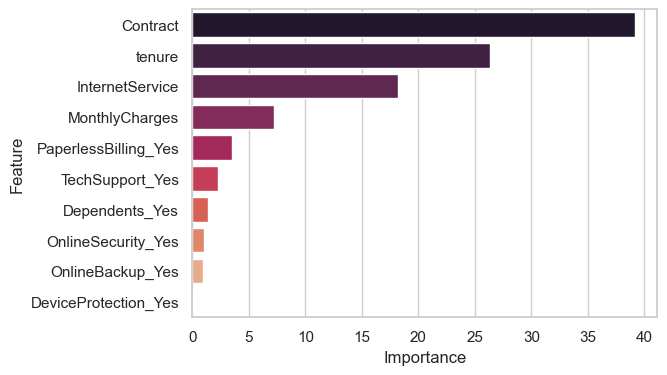

In [166]:
plt.figure(figsize=(6,4))
sns.set_theme(style="whitegrid")
sns.barplot(data=feature_imp, x='Importance', y='Feature', orient='h', palette='rocket')

Terlihat bahwa pada CatBoost kita feature/kolom yang paling penting adalah feature/kolom `Contract` dan diikuti oleh `tenure`,`InternetService`,`MonthlyCharges`,`PaperlessBilling`,`TechSupport`,`Dependents`,`OnlineSecurity`,`OnlineBackup` dan untuk feature/kolom `DeviceProtection` dianggap tidak terlalu penting.

### **Confusion Matrix**

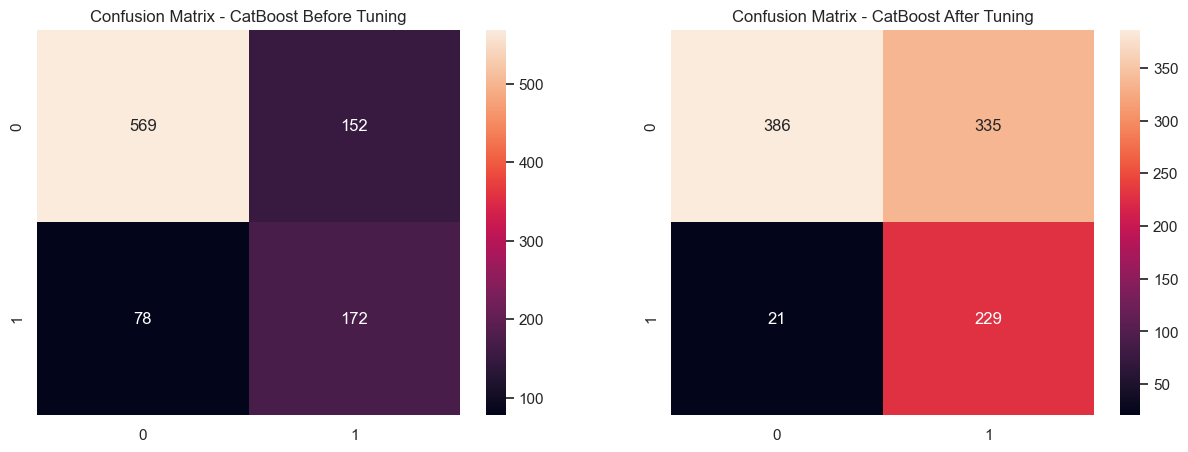

In [168]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
cm1 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm1, annot=True, fmt='g')
plt.title('Confusion Matrix - CatBoost Before Tuning')

# Subplot kedua
plt.subplot(1, 2, 2)
cm2 = confusion_matrix(y_test, y_pred_cat_tuning)
sns.heatmap(cm2, annot=True, fmt='g')
plt.title('Confusion Matrix - CatBoost After Tuning')

plt.show()

Berdasarkan confusion matrix pada test set setelah tuning menggunakan model CatBoost Classifier, dapat disimpulkan:

- **True Positive (TP)** : Terdapat 229 pelanggan yang sebenarnya churn dan berhasil diprediksi dengan benar oleh model.

- **False Negative (FN)** : Ada 21 pelanggan yang sebenarnya churn, tetapi model memprediksi bahwa mereka tidak akan churn.

- **True Negative (TN)** : Sebanyak 386 pelanggan yang sebenarnya tidak churn dan model berhasil memprediksi dengan benar bahwa mereka tidak akan churn.

- **False Positive (FP)** : Terdapat 335 pelanggan yang sebenarnya tidak churn, namun model memprediksi bahwa mereka akan churn.

- Total pelanggan yang diprediksi akan churn: 564 orang (335 FP + 229 TP).

- Total pelanggan yang diprediksi tidak akan churn: 407 orang (386 TN + 21 FN).

In [169]:
# mengecek hasil prediksi berdasarkan Contract
df_check = X_test.copy()
df_check['Prediction'] = y_pred_best_cat

df_check.pivot_table(
    index = 'Contract',
    columns = 'Prediction',
    values = 'MonthlyCharges',
    aggfunc=len
).fillna(0)

Prediction,0,1
Contract,,
Month-to-month,35.0,503.0
One year,150.0,61.0
Two year,222.0,0.0


In [173]:
print('Recall:', recall_score(y_test, y_pred_best_cat))
print('Precision:', precision_score(y_test, y_pred_best_cat))
print('F2 score:', fbeta_score(y_test, y_pred_best_cat, beta=2))

Recall: 0.916
Precision: 0.40602836879432624
F2 score: 0.7320971867007674


### **Cost Benefit Analysis**

**Cost Benefit Analysis tanpa penerapan Machine Learning :** 

- Biaya retensi Cutomer : $63
- Biaya kehilangan Cutomer : $315

Pada situasi tanpa menggunakan machine learning, perusahaan tidak dapat memprediksi Cutomer yang akan churn, sehingga retensi diberikan kepada seluruh Cutomer.

- Jumlah Cutomer yang diberi program retensi: 971 Cutomer
- Jumlah Cutomer yang sebenarnya churn: 250 Cutomer

Estimasi biaya :

- (971 * $63) + (258 * $315) = 61173 + 81270 = $142,443

Maka biaya yang harus dikeluarkan perusahaan setiap bulannya adalah $140,523 untuk 971 pelanggan.

**Cost Benefit Analysis dengan penerapan Machine Learning :**

Dengan menggunakan machine learning, program retensi hanya ditawarkan kepada pelanggan yang diprediksi akan churn.

- Jumlah pelanggan yang diberi program retensi: 564 pelanggan
- Jumlah pelanggan yang sebenarnya churn: 250 pelanggan

Estimasi biaya :

- (564 * $63) + (258 * $315) = 35532 + 81270 = $116,802

Maka Biaya yang harus dikeluarkan perusahaan untuk setiap bulannya $116,802 untuk 971 customer 

**Perbandingan menggunakan Machine Learning dan Tidak Menggunakan Machine Learning**

- Estimasi biaya tanpa machine learning : $142443
- Estimasi biaya dengan machine learning : $116,802

**Persentase Penurunan**

- Penurunan potensi kerugian: $140,523 - $116,802 = $26,241

Persentase Penurunan : (25641/142443) * 100% = 18%

Berdasarkan perhitungan biaya estimasi, penerapan machine learning dapat mengurangi potensi kerugian perusahaan hingga 18.7%. Ini menunjukkan efisiensi dalam alokasi sumber daya untuk program retensi, dengan menargetkan secara lebih tepat pelanggan yang berpotensi untuk churn.

### **Model Limitation**

Perlu diperhatikan bahwa permodelingan ini hanya berlaku untuk :

- Model ini hanya dapat diandalkan untuk data dengan rentang `tenure` antara 0 hingga 72 bulan.
- Analisis dan prediksi model tidak berlaku untuk data dengan `MonthlyCharges` kurang dari 18.8 atau lebih besar dari 118.65.
- Jenis `Contract` yang dapat diproses oleh model terbatas pada 'Month-to-month', 'One year', dan 'Two Year'.
- Model hanya relevan untuk kasus dengan `InternetService` yang dapat diakomodasi sebagai 'DSL', 'Fiber Optic', dan 'No'.
- Variabel `Dependent` dan `Paperless Billing` harus memiliki nilai 'Yes' atau 'No' agar hasil prediksi model berlaku.
- Fitur-fitur seperti `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, dan `TechSupport` hanya dapat memproses nilai 'Yes', 'No', atau 'No internet service',  dan nilai lainnya tidak valid.

## **Conclusion and Recommendations**

### **Conclusion**

Setelah melakukan permodelingan dan mendapatkan best model dapat disimpulkan bahwa : 
- Metric yang digunakan dalam pemodelan adalah F2_score, dengan penekanan pada recall yang dianggap dua kali lebih penting daripada precision.

- Berdasarkan Hyperparameter Tuning untuk best model kita yaitu CatBoost Classifier adalah : 
    - `bagging_temperature` : 0.8817202123338397,
    - `depth` : 3,
    - `iterations` : 53 
    - `l2_leaf_reg` : 6.614442749813741,
    - `learning_rate` : 0.15975765150802665 , 
    - `scale_pos_weight` : 3,
    - `subsample`: 0.5859265495238215  
    <br>
- F2_score terbaik yang dicapai adalah 0.732097.
<br>
- Features/kolom yang paling berpengaruh pada model CatBoost Classifier, berdasarkan tingkat kepentingannya, adalah:
    - `contract` dengan poin sebesar 39.185476
    - `tenure` dengan poin sebesar 26.353524
    - `InternetService` dengan poin sebesar 18.203443
    - `MonthlyCharges` dengan poin sebesar 7.228902
    - `PaperlessBilling` dengan poin sebesar 3.490441
    - `TechSupport` dengan poin sebesar 2.265196
    - `Dependents` dengan poin sebesar 1.339233
    - `OnlineSecurity` dengan poin sebesar 0.989033
    - `OnlineBackup` dengan poin sebesar 0.903804
    - `DeviceProtection` dengan poin sebesar 0.040949.
<br><br>
- Berdasarkan hasil classification report, pemodelan menggunakan model CatBoost dengan metric f2_score :
    - Score Precision : 40.6%
    - Score Recall : 91.6%
    - Score Accuracy : 73.2%
<br><br>
-  Berdasarkan Cost Benefit Analysis : 
    - Penerapan model Machine Learning menghasilkan penghematan biaya sebesar $26,241 atau 18% dibandingkan dengan skenario tanpa Machine Learning.
    - Tanpa Machine Learning, biaya yang dikeluarkan perusahaan mencapai $142,443 untuk 971 pelanggan.
    - Dengan penerapan Machine Learning, biaya dapat ditekan menjadi $116,802 untuk jumlah pelanggan yang sama.


### **Recommendations**

Rekomendasi aksi yang dapat dilakukan perusahaan untuk meminimalisir jumlah pelanggan yang akan *chur*  :

1. Promosi Migrasi Kontrak:
    - Tawarkan insentif menarik kepada pelanggan dengan `contract` jangka pendek (Month-to-month) untuk beralih ke `contract` jangka panjang (One year atau Two year). Hal ini dapat mengurangi potensi *churn* karena pelanggan cenderung lebih loyal pada contract jangka panjang.
<br><br>
2. Program Loyalty Berbasis `tenure`:
    - Implementasikan Customer Loyalty Program yang memberikan reward proporsional dengan masa tenure pelanggan. Semakin lama pelanggan bertahan, semakin besar reward yang diperoleh. Strategi ini mendorong pelanggan untuk memperpanjang masa tenure mereka.
    <br><br>
3. Diskon Khusus untuk Pelanggan Berpotensi *Churn*:
    - Berikan diskon atau potongan harga pada `MonthlyCharges` untuk pelanggan yang memiliki indikasi atau prediksi churn, terutama bagi mereka dengan MonthlyCharges yang tinggi. Hal ini dapat menjadi insentif efektif untuk mempertahankan pelanggan yang berpotensi beralih ke perusahaan layanan lain.
<br><br>
4. Penawaran Khusus Internet Fiber Optic:
    - Sediakan layanan Internet Fiber Optic dengan harga yang lebih kompetitif. Berdasarkan analisis, rata-rata MonthlyCharges untuk Fiber Optic lebih tinggi.
    - Penawaran harga yang lebih terjangkau dapat mengurangi kemungkinan churn, terutama bagi pelanggan yang cenderung meninggalkan layanan akibat biaya yang tinggi.

Dengan mengimplementasikan langkah-langkah ini, perusahaan dapat secara proaktif meminimalisir potensi churn dan membangun hubungan yang lebih kuat dengan pelanggan, melalui kombinasi insentif, program loyalitas, dan penyesuaian layanan.



Hal-hal yang bisa dilakukan untuk mengembangkan project dan modelnya lebih baik lagi diantaranya:

1. Penambahan Fitur Sentimen Pelanggan:
    - Mengintegrasikan analisis sentimen pada feedback atau interaksi pelanggan dapat memberikan wawasan mengenai perasaan mereka terhadap layanan. Hal ini dapat menjadi indikator potensial untuk churn jika terdapat pola sentimen negatif yang konsisten.
<br><br>
2. Pemodelan Interaksi Produk:
    - Menambahkan fitur yang merepresentasikan interaksi antar produk atau layanan dapat membantu dalam memahami bagaimana kombinasi penggunaan berbagai produk dapat memengaruhi keputusan pelanggan. Model dapat menjadi lebih presisi dalam mengidentifikasi pola-pola perilaku yang berkaitan dengan churn.
<br><br>
3. Penyempurnaan Data Churn:
    - Melakukan penyempurnaan pada data kelas minoritas (Churn) dengan mengumpulkan informasi lebih lanjut atau mencari sumber data tambahan dapat meningkatkan keakuratan model. Pengembangan ini penting untuk menghadapi perubahan perilaku pelanggan.
<br><br>
4. Ensemble Model:
    - Mengimplementasikan ensemble model dengan menggabungkan hasil dari beberapa algoritma machine learning dapat meningkatkan keandalan prediksi. Pendekatan ini dapat membantu model untuk lebih tangguh terhadap variasi data dan kompleksitas pola.
<br><br>
    
Dengan menyertakan elemen-elemen ini dalam pengembangan model, diharapkan perusahaan dapat mencapai tingkat akurasi dan keandalan yang lebih tinggi dalam mengidentifikasi pelanggan yang berpotensi untuk churn.

## **Save Model**

In [171]:
# import pickle

In [172]:
# # fit
# final_model.fit(X, y)

# # save with pickle
# pickle.dump(final_model, open('best_model_catboost.sav', 'wb'))

0:	learn: 0.6211629	total: 3.6ms	remaining: 187ms
1:	learn: 0.5668811	total: 6.93ms	remaining: 177ms
2:	learn: 0.5293118	total: 9.95ms	remaining: 166ms
3:	learn: 0.4978598	total: 14ms	remaining: 172ms
4:	learn: 0.4732427	total: 17.4ms	remaining: 167ms
5:	learn: 0.4519055	total: 20.6ms	remaining: 161ms
6:	learn: 0.4345463	total: 23.5ms	remaining: 154ms
7:	learn: 0.4210933	total: 26.4ms	remaining: 148ms
8:	learn: 0.4103680	total: 30.5ms	remaining: 149ms
9:	learn: 0.4000485	total: 33.3ms	remaining: 143ms
10:	learn: 0.3933328	total: 37.7ms	remaining: 144ms
11:	learn: 0.3875783	total: 40.7ms	remaining: 139ms
12:	learn: 0.3817975	total: 44.2ms	remaining: 136ms
13:	learn: 0.3769561	total: 47.3ms	remaining: 132ms
14:	learn: 0.3733021	total: 50.3ms	remaining: 127ms
15:	learn: 0.3710876	total: 53.4ms	remaining: 123ms
16:	learn: 0.3682542	total: 57ms	remaining: 121ms
17:	learn: 0.3660066	total: 60.6ms	remaining: 118ms
18:	learn: 0.3638702	total: 63.5ms	remaining: 114ms
19:	learn: 0.3617722	total: